In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import fnmatch
from PyPDF2 import PdfFileMerger

20201216


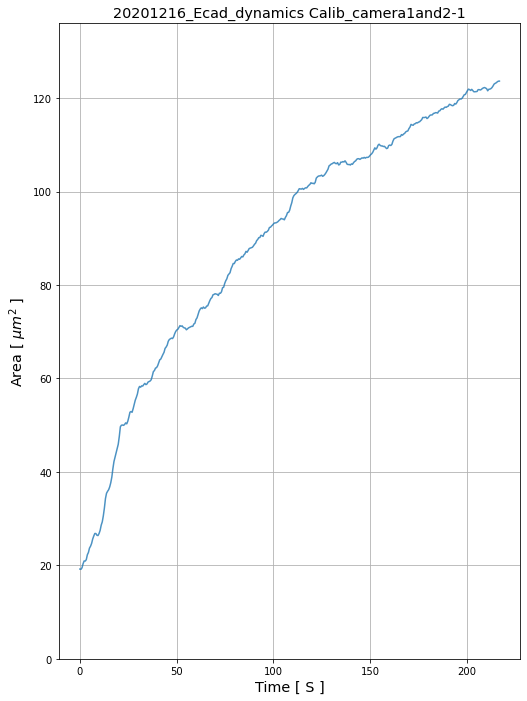

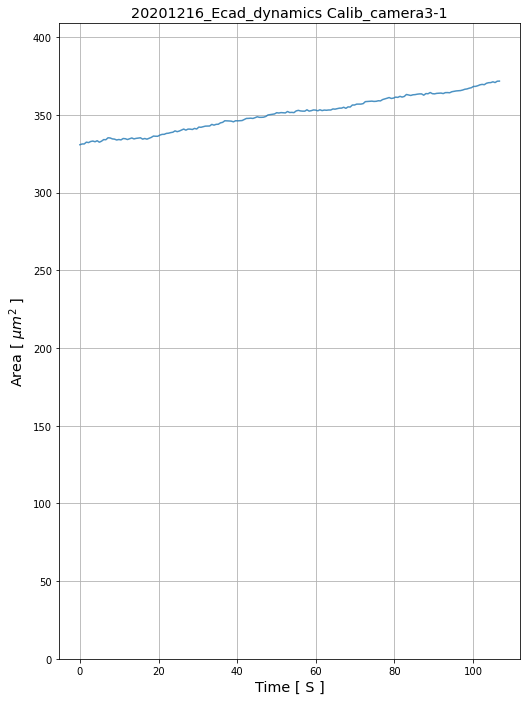

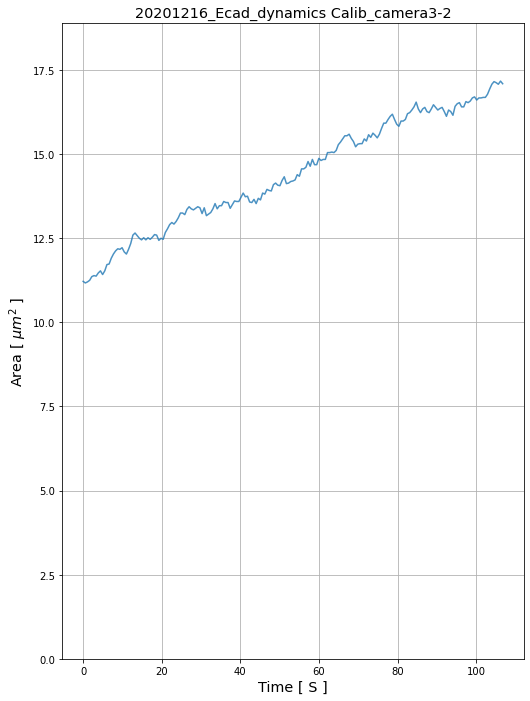

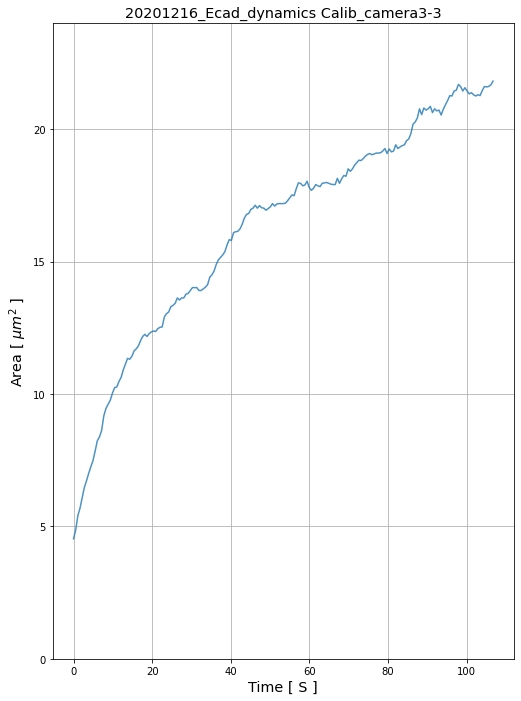

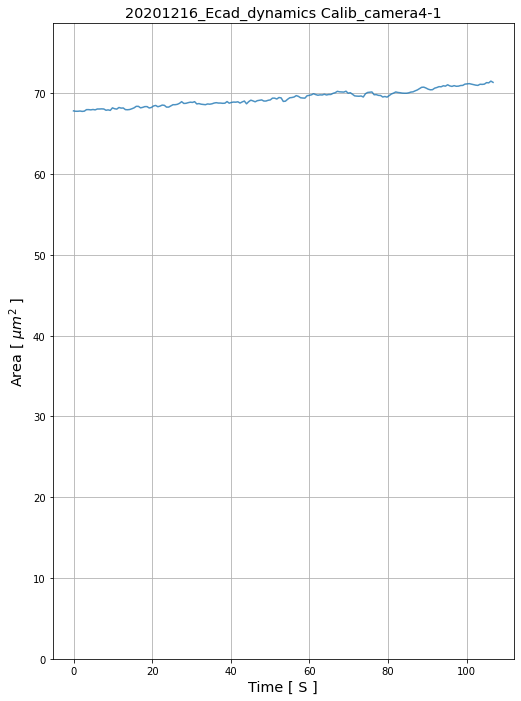

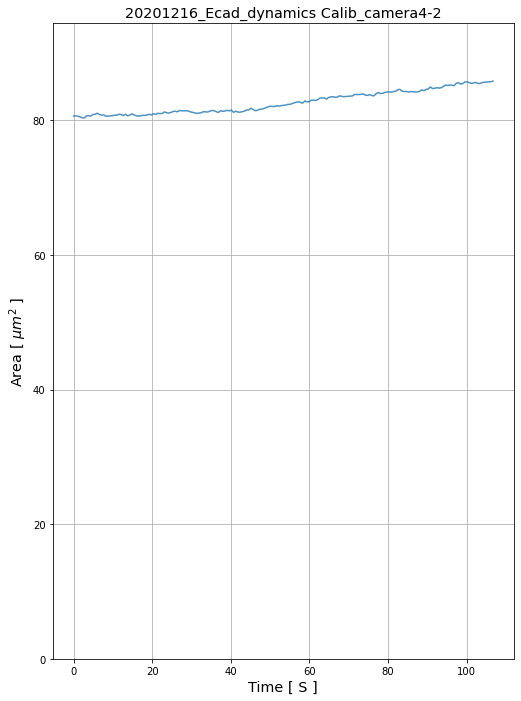

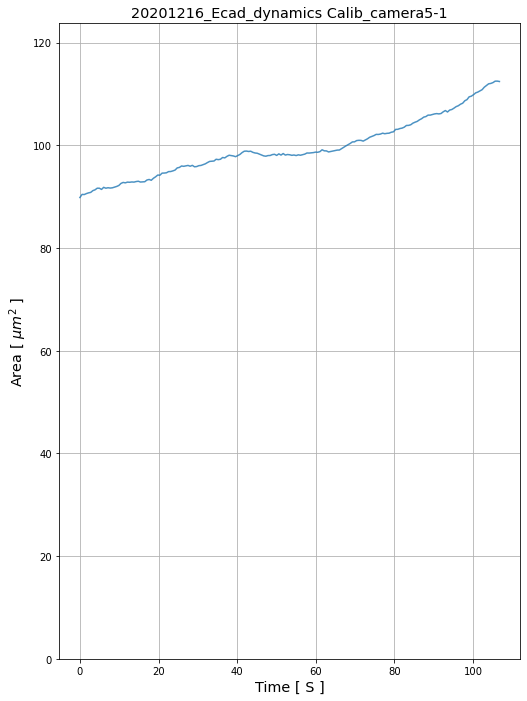

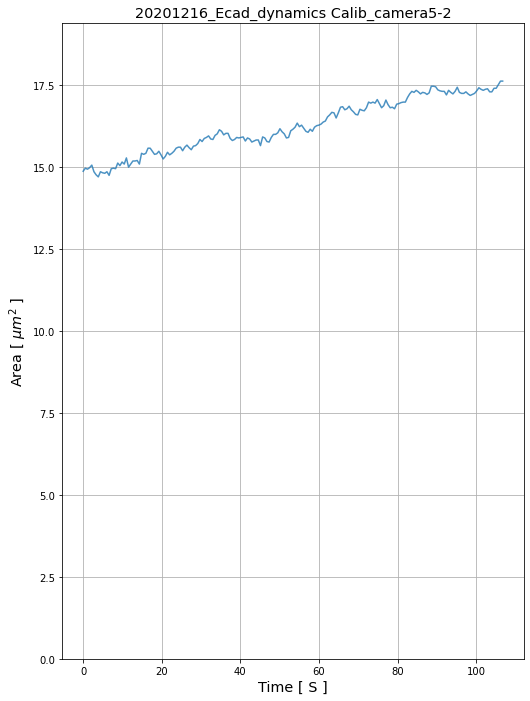

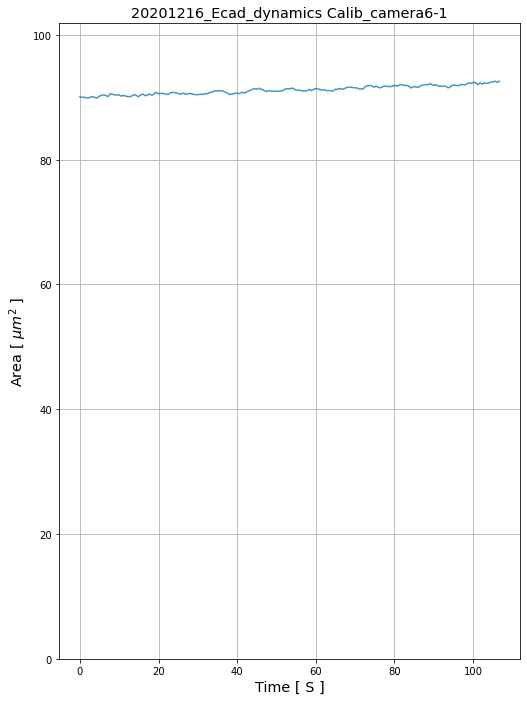

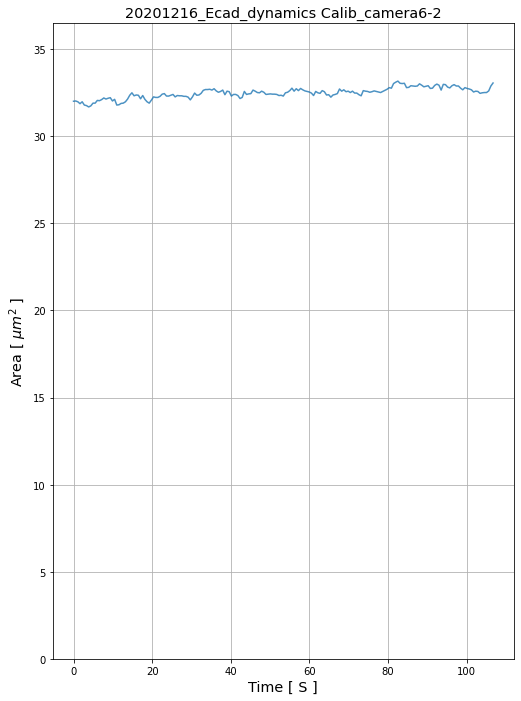

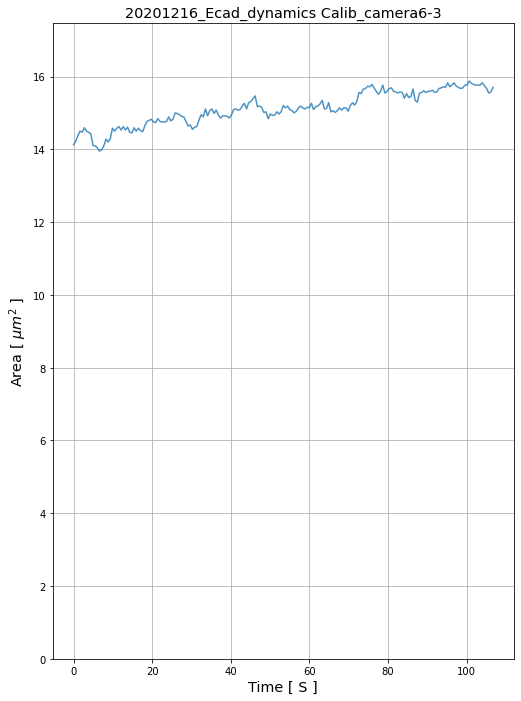

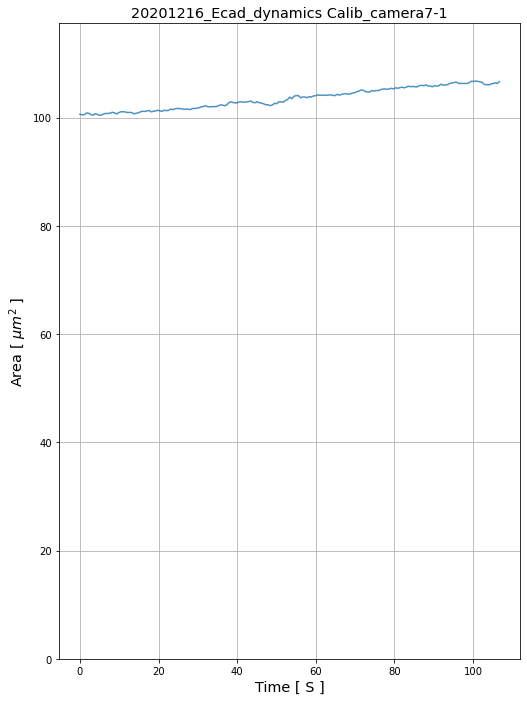

20210112


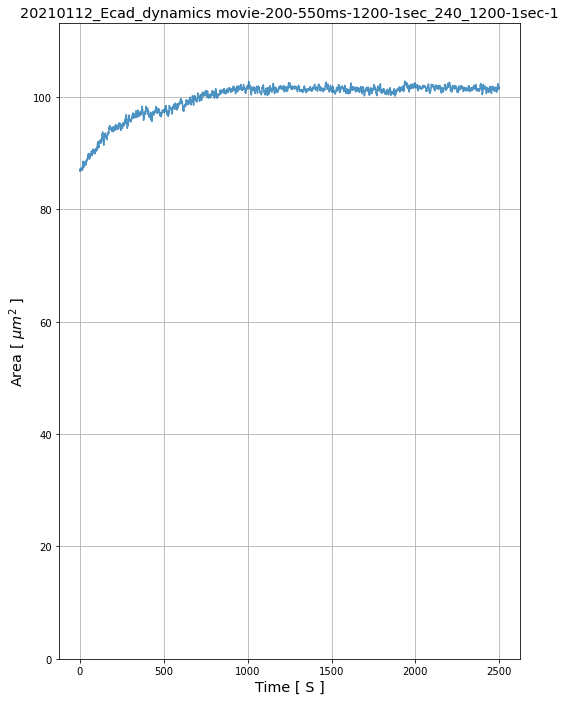

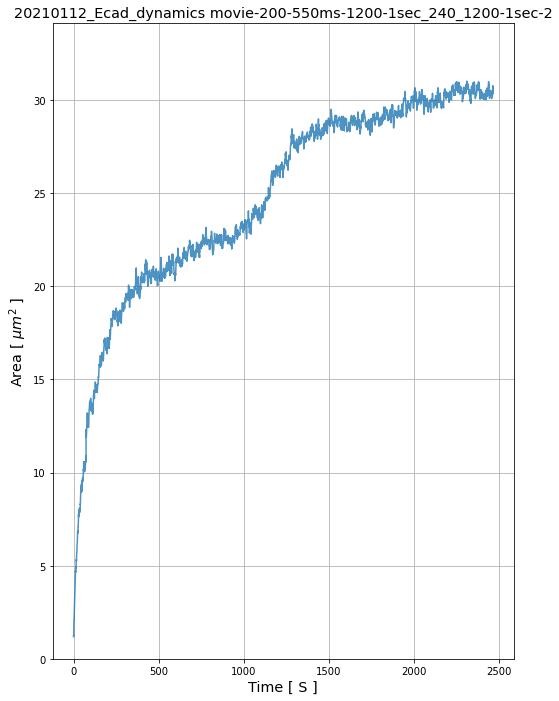

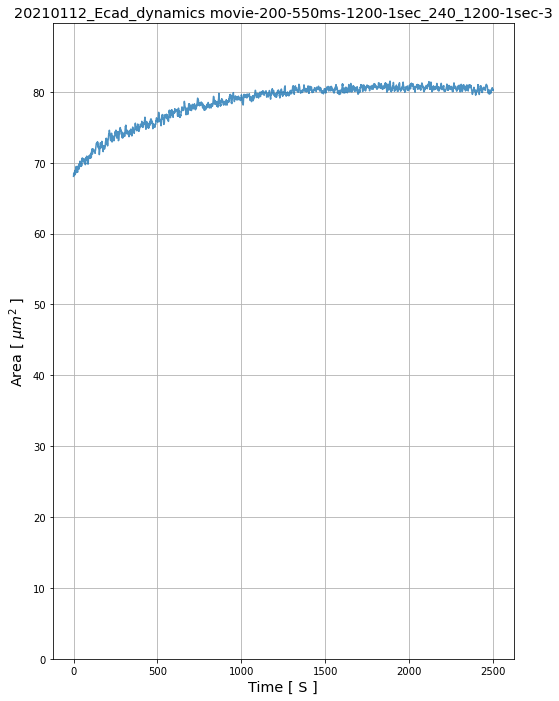

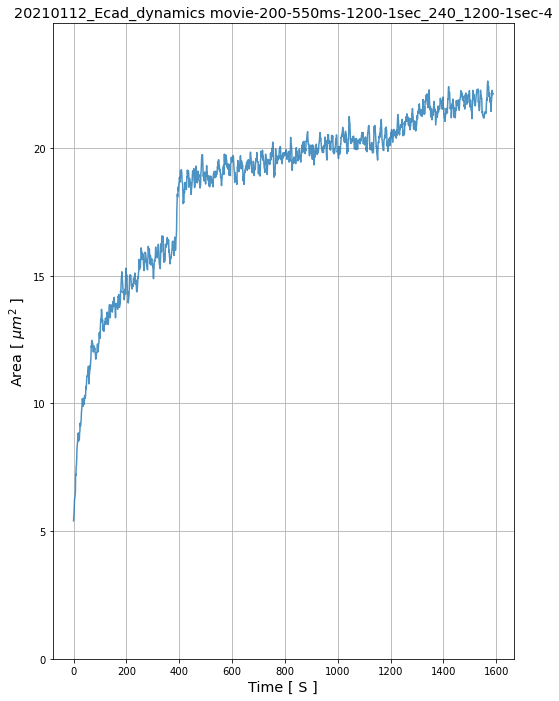

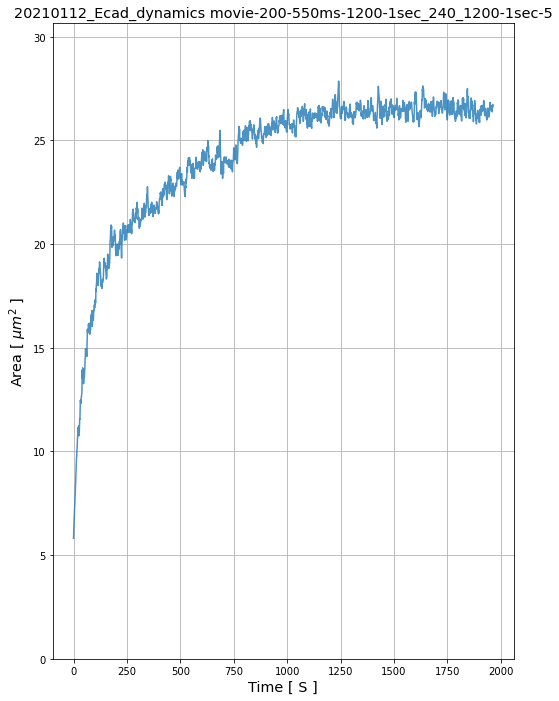

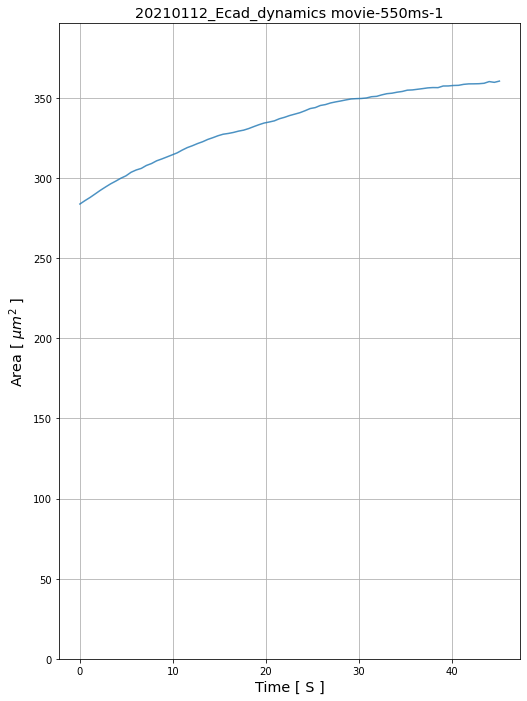

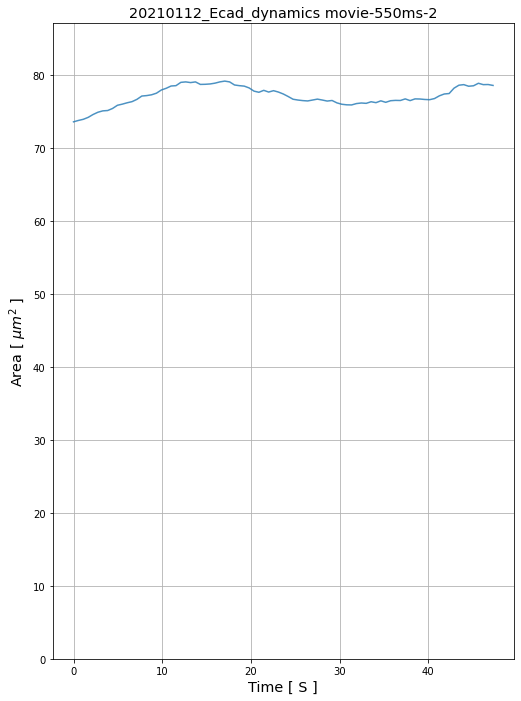

20210122


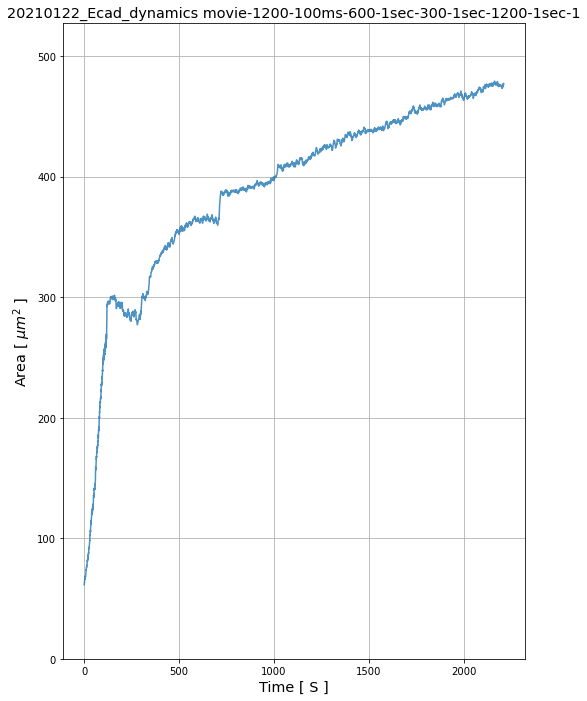

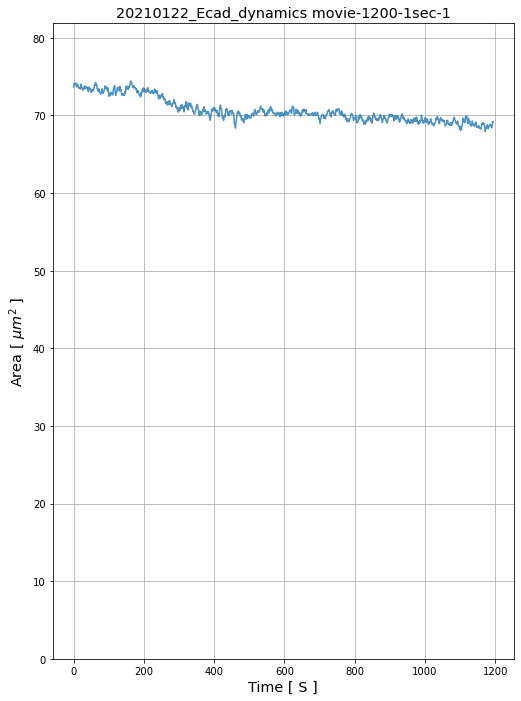

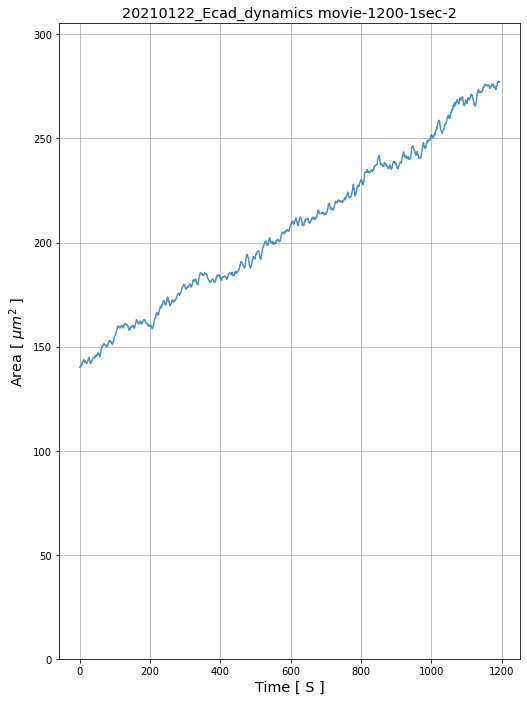

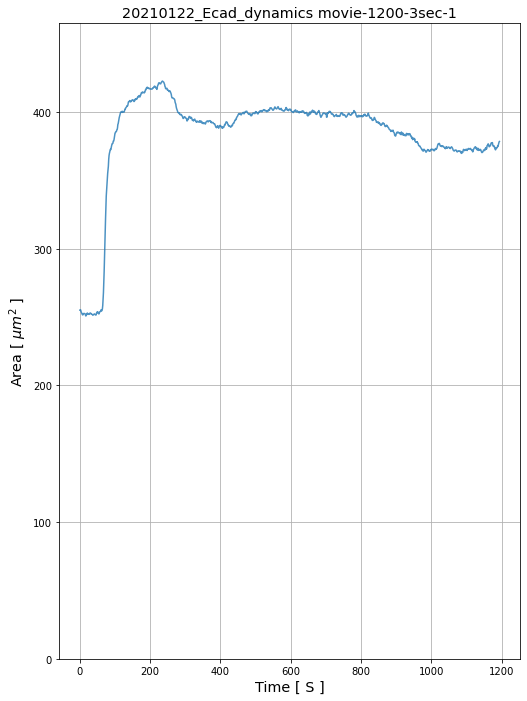

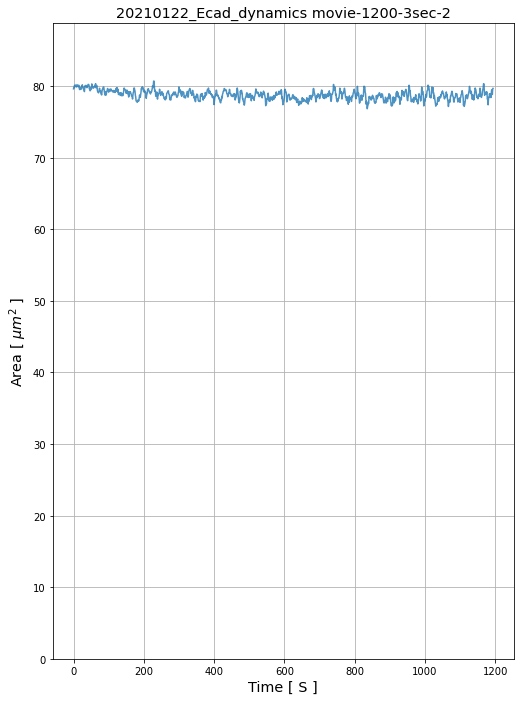

20210212


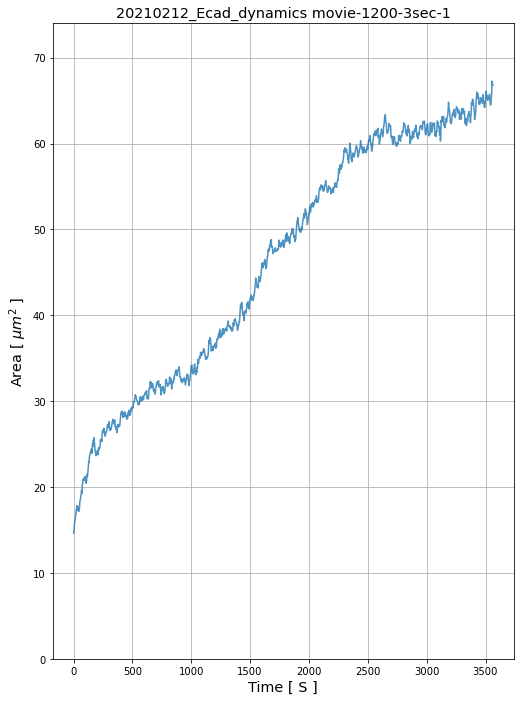

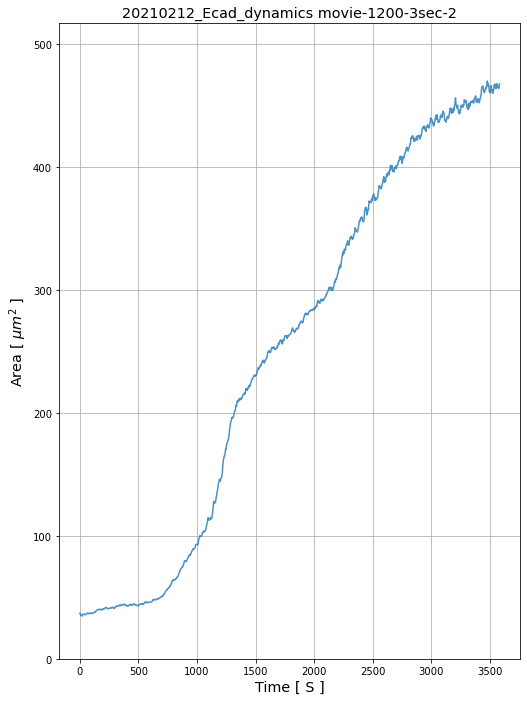

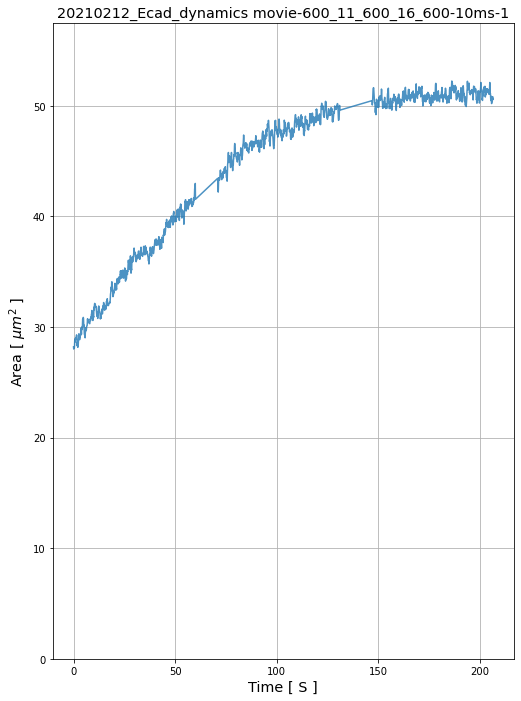

20210330


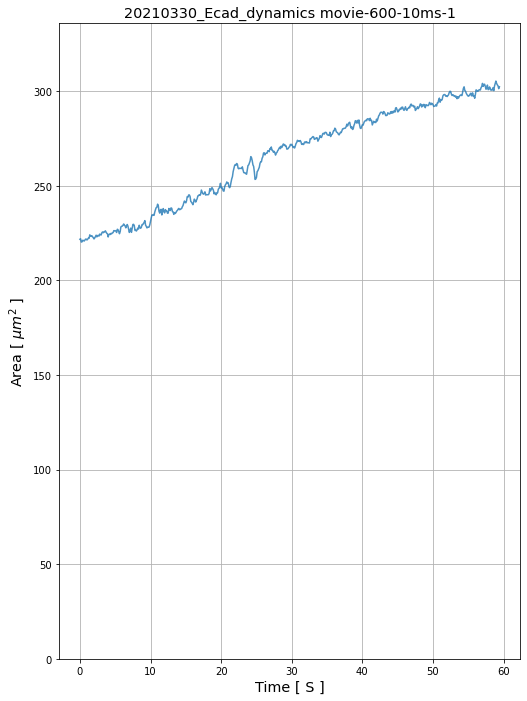

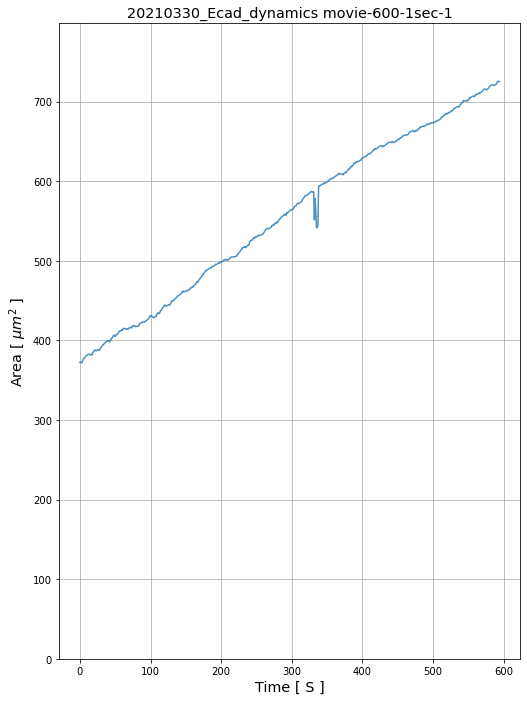

In [22]:
EXPERIMENTS = ['20201216_Ecad_dynamics', '20210112_Ecad_dynamics','20210122_Ecad_dynamics',
               '20210212_Ecad_dynamics', '20210330_Ecad_dynamics']
for experiment in EXPERIMENTS:
    print(experiment.split(sep='_')[0])
    dfs = [df for df in [f.name for f in os.scandir("{}/results".format(experiment))]
           if fnmatch.fnmatch(df, '*.csv')]
    dfs.sort()
    for DF in dfs:
        # Read the data frame of the scaled time and area
        df = pd.read_csv('{}/results/{}'.format(experiment,DF))
        # Plot the curve
        plt.figure(figsize=(8.27,11.69))
        plt.plot(df['Time'], df['Area'], label = '{}_{}'.format(experiment, DF), alpha = 0.8)
        plt.title('{} {}'.format(experiment, DF.split(sep='.')[0]), fontsize= 'x-large')
        plt.xlabel('Time [ S ]', fontsize = "x-large")
        plt.ylabel('Area [ $\mu m^2$ ]', fontsize = "x-large")
        plt.ylim(0,df['Area'].max() + df['Area'].max()/10)
        plt.grid()
        plt.savefig("data_pdf/{}_{}_FromZero.pdf".format(experiment, DF.split(sep='.')[0]))
        plt.show();

In [35]:
pdfs = [pdf for pdf in [f.name for f in os.scandir("data_pdf")] if fnmatch.fnmatch(pdf, '*FromZero.pdf')]

pdfs.sort()

merger = PdfFileMerger()

for pdf in pdfs:
    merger.append('data_pdf/{}'.format(pdf))

merger.write("data_pdf/all_curves.pdf")
merger.close()